# 0.0 Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import inflection

from pandas_profiling import ProfileReport
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from IPython.display import Image
from IPython.core.display import HTML

## 0.1 Helper functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Load Data

In [3]:
df = pd.read_csv('..\churn.csv')
df.drop('RowNumber', axis=1, inplace=True)

# 1.0 Data Description

In [5]:
df1 = df.copy()

## 1.1 Features' Description

* RowNumber: O número da coluna
* CustomerID: Identificador único do cliente
* Surname: Sobrenome do cliente.
* CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.
* Geography: O país onde o cliente reside.
* Gender: O gênero do cliente.
* Age: A idade do cliente.
* Tenure: Número de anos que o cliente permaneceu ativo.
* Balance: Valor monetário que o cliente tem em sua conta bancária.
* NumOfProducts: O número de produtos comprado pelo cliente no banco.
* HasCrCard: Indica se o cliente possui ou não cartão de crédito.
* IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.
* EstimateSalary: Estimativa do salário mensal do cliente.
* Exited: Indica se o cliente está ou não em Churn.

## 1.1 Data Dimensions

In [6]:
print('The dataset contains {} rows'. format(df1.shape[0]))
print('The dataset contains {} columns'. format(df1.shape[1]))

The dataset contains 10000 rows
The dataset contains 13 columns


## 1.2 Rename Columns

In [7]:
cols_old = df1.columns.to_list()

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

## 1.3 Data Types

In [8]:
# Data types seem correct by default
df1.dtypes

customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

## 1.4 Null  Values

In [9]:
# No NAs
df1.isna().sum()

customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## 1.5 Descriptive Statistics

In [10]:
num = df1.select_dtypes(include=['int64','float64'])
cat = df1.select_dtypes(exclude=['int64','float64'])

### 1.5.1 Numerical Variables

In [11]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame(num.apply(np.mean)).T
ct2 = pd.DataFrame(num.apply(np.median)).T

# Dispersion - standard desviatiom, skew, kurtosis, min, max, range
d1 = pd.DataFrame(num.apply(min)).T
d2 = pd.DataFrame(num.apply(max)).T
d3 = pd.DataFrame(num.apply(lambda x: x.max()-x.min())).T
d4 = pd.DataFrame(num.apply(np.std)).T
d5 = pd.DataFrame(num.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num.apply(lambda x: x.kurtosis())).T

ctd = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()
ctd.columns = ['features', 'mean','median','min','max','range','std','skew','kurtosis']
ctd.drop([0], inplace=True) # Drop customer_id
ctd

,features,mean,median,min,max,range,std,skew,kurtosis
1,credit_score,650.528800,652.000,350.00,850.00,500.00,96.648466,-0.071607,-0.425726
2,age,38.921800,37.000,18.00,92.00,74.00,10.487282,1.011320,1.395347
3,tenure,5.012800,5.000,0.00,10.00,10.00,2.892030,0.010991,-1.165225
4,balance,76485.889288,97198.540,0.00,250898.09,250898.09,62394.285254,-0.141109,-1.489412
5,num_of_products,1.530200,1.000,1.00,4.00,3.00,0.581625,0.745568,0.582981
6,has_cr_card,0.705500,1.000,0.00,1.00,1.00,0.455818,-0.901812,-1.186973
7,is_active_member,0.515100,1.000,0.00,1.00,1.00,0.499772,-0.060437,-1.996747
8,estimated_salary,100090.239881,100193.915,11.58,199992.48,199980.90,57507.617221,0.002085,-1.181518
9,exited,0.203700,0.000,0.00,1.00,1.00,0.402748,1.471611,0.165671


### 1.5.1 Categorical Variables

In [12]:
cat.apply(lambda x:x.nunique())

surname      2932
geography       3
gender          2
dtype: int64

In [13]:
# Countries 
cat.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# 2.0 Feature Engeenering

In [14]:
df2 = df1.copy()

## 2.1 Mind Map

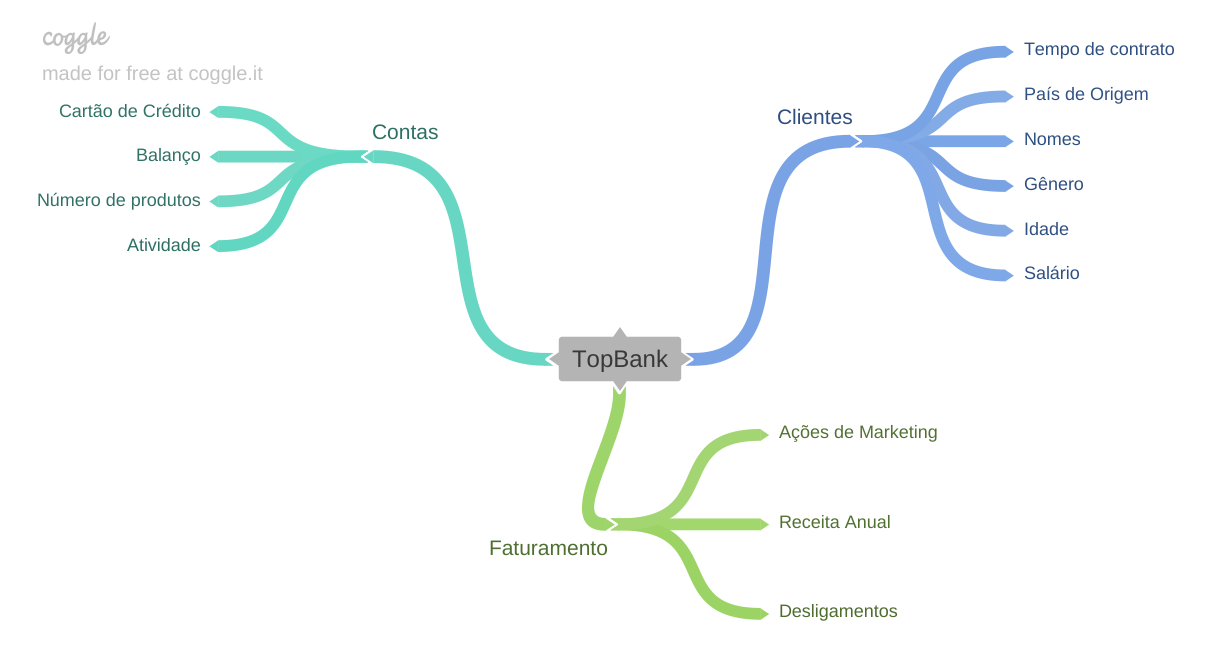

In [15]:
Image('topban-hypothesis.png')

## 2.2 Hypothesis

Faturamento
* Quanto maior o credit score, maior o faturamento
* Quanto mais anos de contrato, maior o faturamento
* Quanto maior o número de produtos, maior o faturamento
* Se possui cartao de crédito, maior é o faturamento

Contas
* Quanto maior o salário maior o credit_score
* Quanto maior o balanço maior o credit_score
* Quanto maior o numéro de produtos maior o credit score
* Quanto maior o numéro de produtos, mais anos de contrato
* Se não é membro ativo significa que entrou em churn.
* Quanto mais anos de contrato, menor a proporção de churn

Clientes
* Homens possuem balanços maiores que mulheres
* Homens possuem salários maiores que mulheres
* Quanto mais velho o cliente, maior a probabilidade de ter mais anos de contrato
* Quanto mais velho o cliente, maior a probabilidade de ter um balanço alto
* Quanto mais velho o cliente, maior a probabilidade de ter um salário alto

## 2.3 Feature Creation

In [16]:
### Anual Revenue per customer

## Try - List comprehension
# df2['anual_revenue'] = [ (salary *0.15) if (salary < df2['estimated_salary'].mean()) else (salary *0.20) if (salary > df2['estimated_salary'].mean()) for salary in df2['estimated_salary']]

anual_revenue = []
for salary in df2['estimated_salary']:
    if salary < df2['estimated_salary'].mean():
        anual_revenue.append(salary*0.15)
    elif salary > df2['estimated_salary'].mean():
        anual_revenue.append(salary*0.20)
df2['anual_revenue'] = pd.Series(anual_revenue)

# 3.0 Feature Filtering

In [17]:
df3 = df2.copy()

## 3.1 Column Filtering

In [18]:
# Drop customer_id and surname
df3.drop(['customer_id','surname'], axis=1, inplace=True)

# 4.0 EAD (Exploratory Data Analysis)

In [19]:
df4 = df3.copy()

## 4.1 Univariate Analysis

### 4.1.1 Numerical Variables

**Churn**

In [20]:
print('There are {} customers in churn.'.format(df4.exited.value_counts()[1]))
print('This represents {:.1%} percent of the customer base'.format(df4.exited.value_counts()[1]/df4.shape[0]))

There are 2037 customers in churn.
This represents 20.4% percent of the customer base


**Active account**

In [21]:
print('There are {} that have not done any account moviment in the last year.'.format(df4.is_active_member.value_counts()[0]))
print('This represents {:.1%} percent of the customer base'.format(df4.is_active_member.value_counts()[0]/df4.shape[0]))

There are 4849 that have not done any account moviment in the last year.
This represents 48.5% percent of the customer base


**NOTE**: This might mean that, first, not active clients may have a higher probability to become churn at the end of the contract and, second, MANY customers may become churn in the future.

**Tenure**

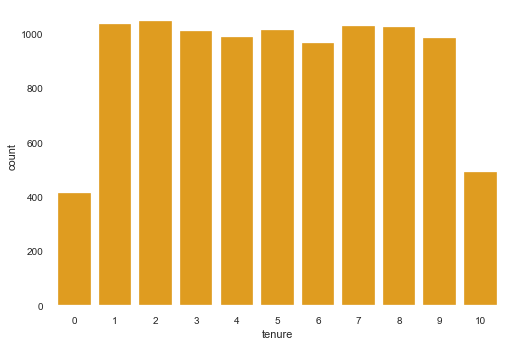

In [22]:
sns.countplot(df4.tenure, color='orange');
# Quite similar distribuition of tenure year 

**Age**

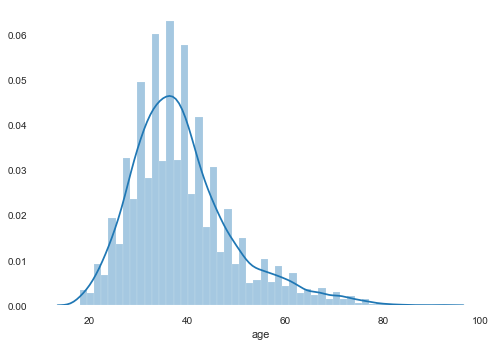

In [35]:
sns.distplot(df4.age);

**Number of Products**

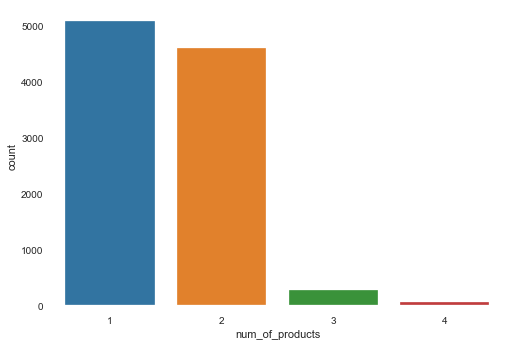

In [23]:
sns.countplot(df4.num_of_products);
# The vast majority of clients only have 1-to-2 products

**Credit Card**

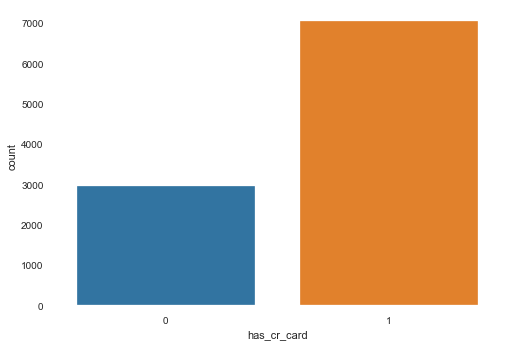

In [24]:
sns.countplot(df4.has_cr_card);
# Most customers use credit card

**Credit Score**

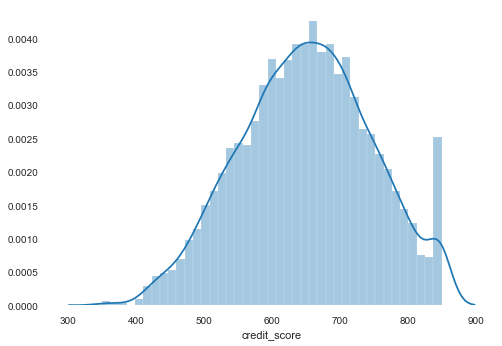

In [25]:
sns.distplot(df4.credit_score);

**Balance**

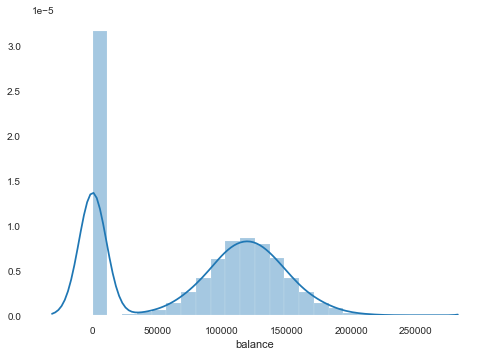

In [26]:
sns.distplot(df4.balance);

**Estimated Salary**

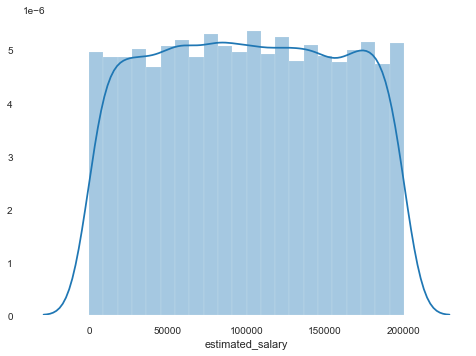

In [27]:
sns.distplot(df4.estimated_salary);

**Anual Revenue**

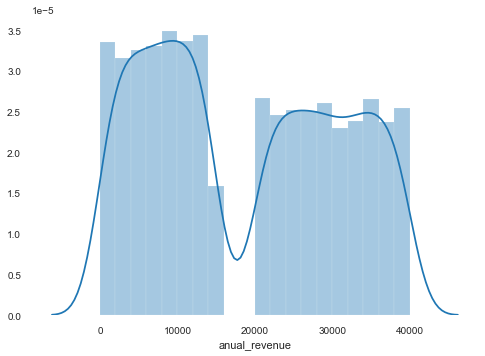

In [28]:
sns.distplot(df4.anual_revenue);
# I guess this shape is resulted from not using the estimated salary mean itself in the calculation 

In [29]:
df4.anual_revenue.describe()

count    10000.000000
mean     18761.207750
std      12313.366213
min          1.737000
25%       7650.316500
50%      20038.783000
75%      29877.649500
max      39998.496000
Name: anual_revenue, dtype: float64

### 4.1.2 Categorical Variables

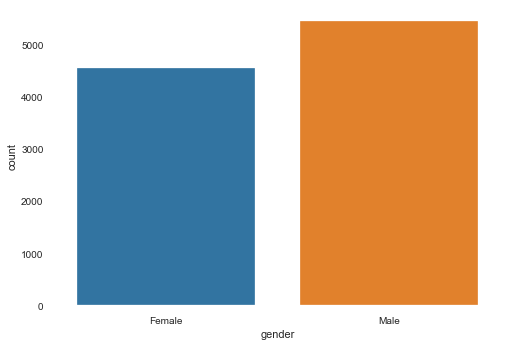

In [30]:
sns.countplot(df4.gender);
# Most customers are male.

**Countries**

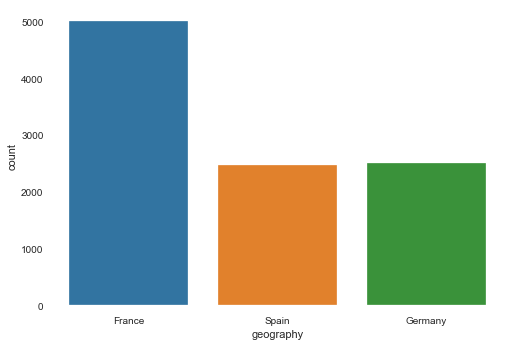

In [31]:
sns.countplot(df4.geography);
# Most customers are from France

## 4.1.3 Pandas Profiling

In [34]:
profile = ProfileReport(df4, title='TopBanck Churn Analysis - Exploratory Data Analysis', html={'style':{'full_width':True}})
profile.to_file(output_file="EDA.html")

**Notes**
* 36,2% of the customers (3617) have a zero `balance`
* High number of clients that have a 10 year `tenure` (??????)
* `credit_score` has almost a normal distribuition
* High number of inactive members in`is_active_member` (4894) --> Deeper the analysis


## 4.2 Bivariate Analysis

Faturamento
* Quanto maior o credit score, maior o faturamento
* Quanto mais anos de contrato, maior o faturamento
* Quanto maior o número de produtos, maior o faturamento
* Se possui cartao de crédito, maior é o faturamento

Contas
* Quanto maior o salário maior o credit_score
* Quanto maior o balanço maior o credit_score
* Quanto maior o numéro de produtos maior o credit score
* Quanto maior o numéro de produtos, mais anos de contrato
* Se não é membro ativo significa que entrou em churn.
* Quanto mais anos de contrato, menor a proporção de churn

Clientes
* Homens possuem maior média de balanços que mulheres
* Homens possuem maior média salarial que mulheres
* Quanto mais velho o cliente, maior o número de anos de contrato
* Quanto mais velho o cliente, maior o balanço
* Quanto mais velho o cliente, maior o salário.

### 4.2.1 Clientes

**Homens possuem maior média de balanços que mulheres.**

**R: Verdadeiro, homens possuem maior média de balanço que mulheres. Ainda que sejam muito próximos**

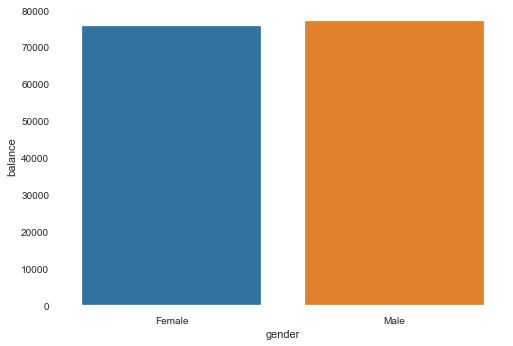

In [39]:
# Homens possuem maior média de balanços que mulheres

aux1 = df4[['gender','balance']].groupby('gender').mean().reset_index()
sns.barplot(x='gender',y='balance', data=aux1);


**Homens possuem média salarial maior que mulheres**

**R: Falso, mulheres possuem uma média salarial maior que homens, ainda que sejam muito próximos.**

   gender  estimated_salary
0  Female     100601.541382
1    Male      99664.576931


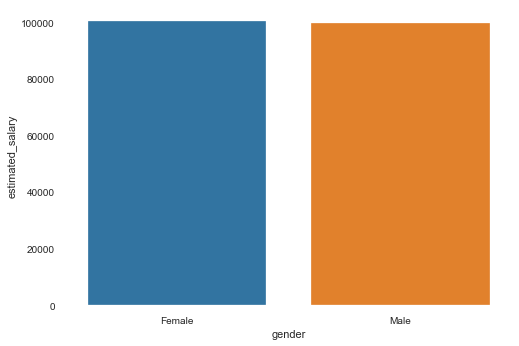

In [41]:
# Homens possuem média salarial maior que mulheres

aux2 = df4[['gender','estimated_salary']].groupby('gender').mean().reset_index()
print(aux2)
sns.barplot(x='gender',y='estimated_salary', data=aux2);

**Quanto mais velho o cliente, mais anos de contrato.**

**R: Falso, não há evidência de que quanto mais velho o cliente, maior o número de anos do contrato.**

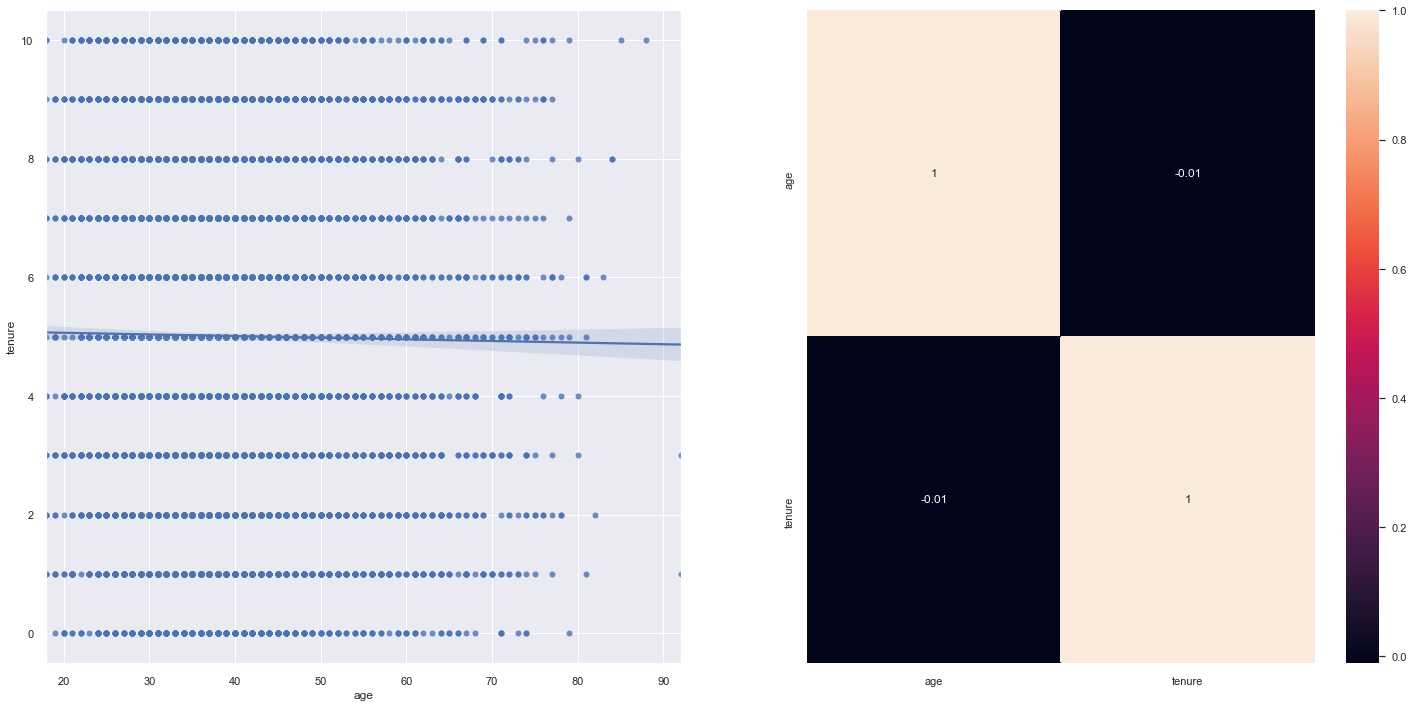

In [58]:
# Quanto mais velho o cliente, mais anos de contrato.

plt.subplot(1,2,1)
sns.regplot(x='age',y='tenure',data=df4);

plt.subplot(1,2,2)
sns.heatmap(df4[['age','tenure']].corr(method='pearson'), annot=True);

**Quanto mais velho o cliente, maior o balanço**

**R: Falso, não há evidências de que quanto mais velhor o cliente, maior o balanço**

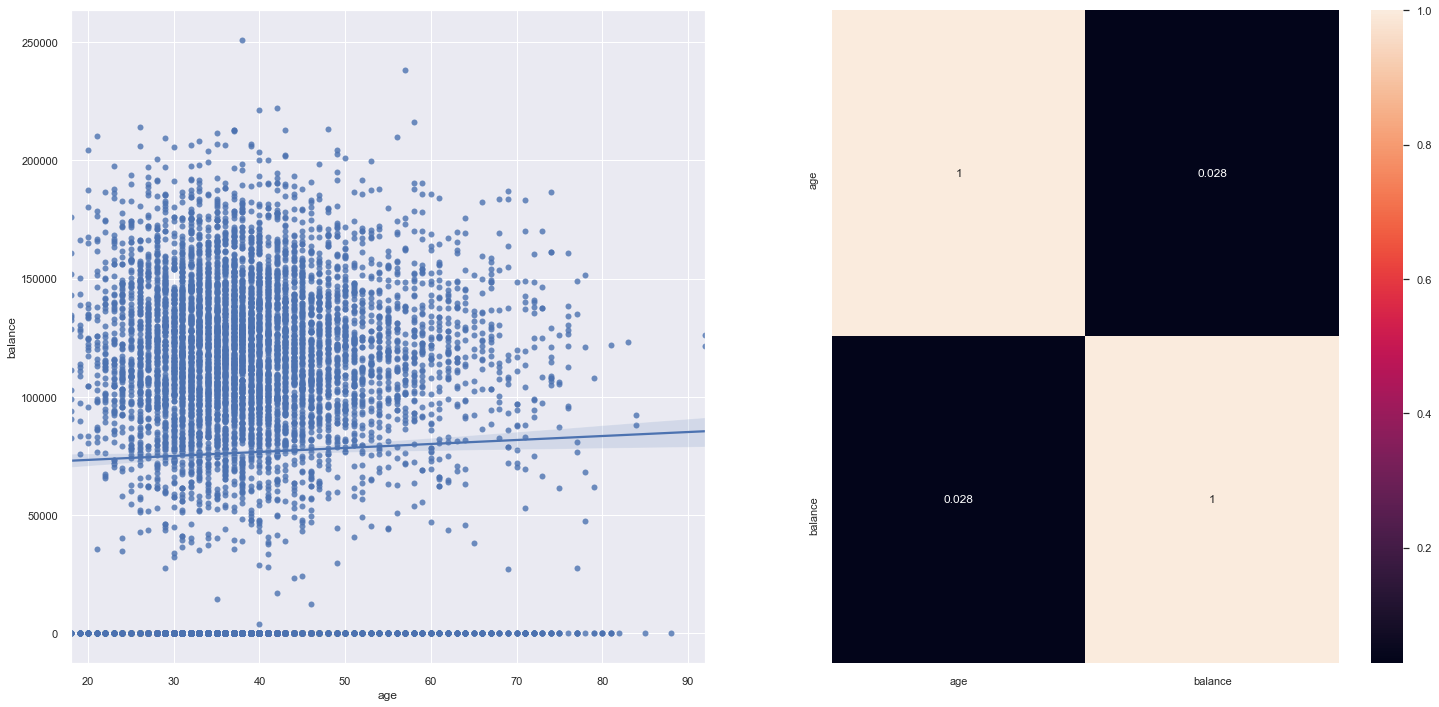

In [57]:
# Quanto mais velho o cliente, maior o balanço alto
plt.subplot(1,2,1)
sns.regplot(x='age',y='balance', data=df4);

plt.subplot(1,2,2)
sns.heatmap(df4[['age','balance']].corr(method='pearson'),annot=True);

**Quanto mais velho o cliente, maior o salário**

**R: Falso, não há evidênica de que quanto mais velho o cliente, amior seja o salário.**

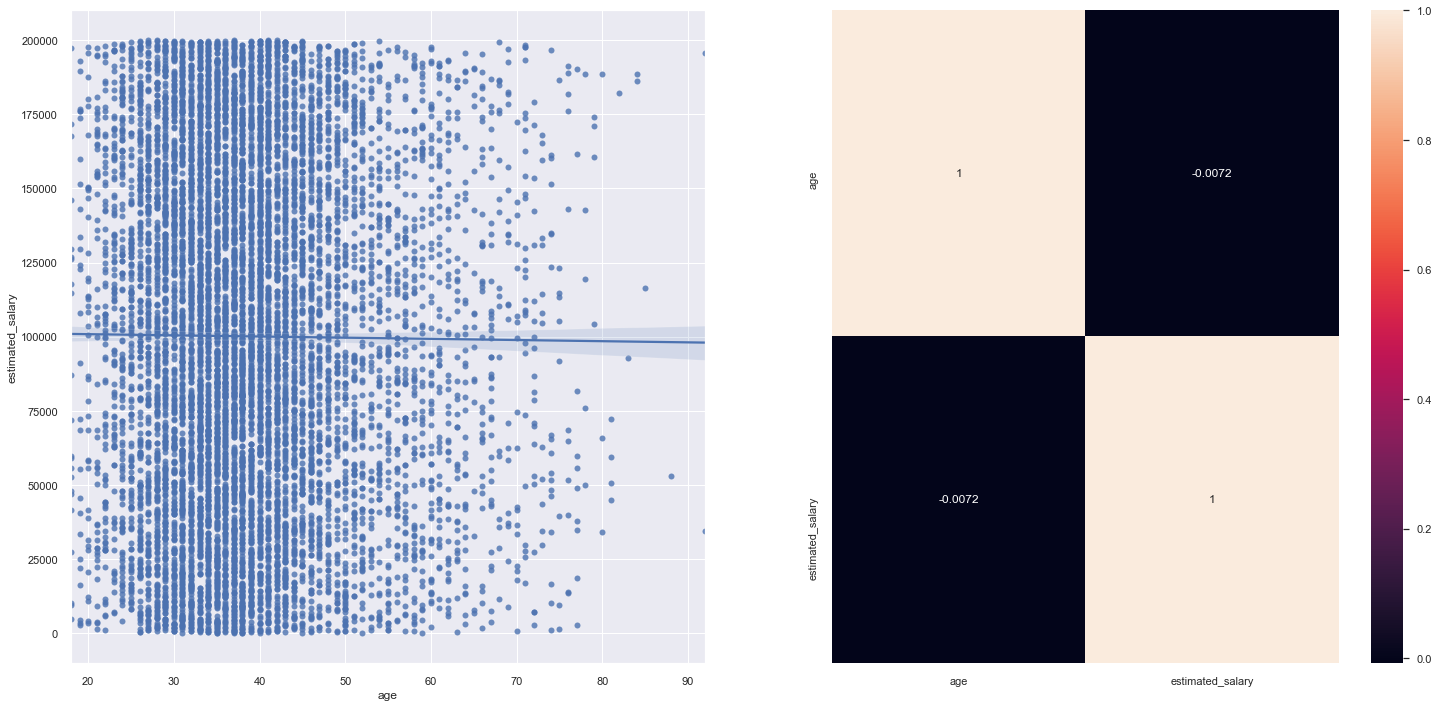

In [60]:
# Quanto mais velho o cliente, maior a probabilidade de ter um salário alto
plt.subplot(1,2,1)
sns.regplot(x='age',y='estimated_salary',data=df4);

plt.subplot(1,2,2)
sns.heatmap(df4[['age','estimated_salary']].corr(method='pearson'),annot=True);

### 4.2.2. Contas

**Quanto maior o salário maior o credit_score.**

**R: Falso, não há correlação alguma entre salário e credit score.**


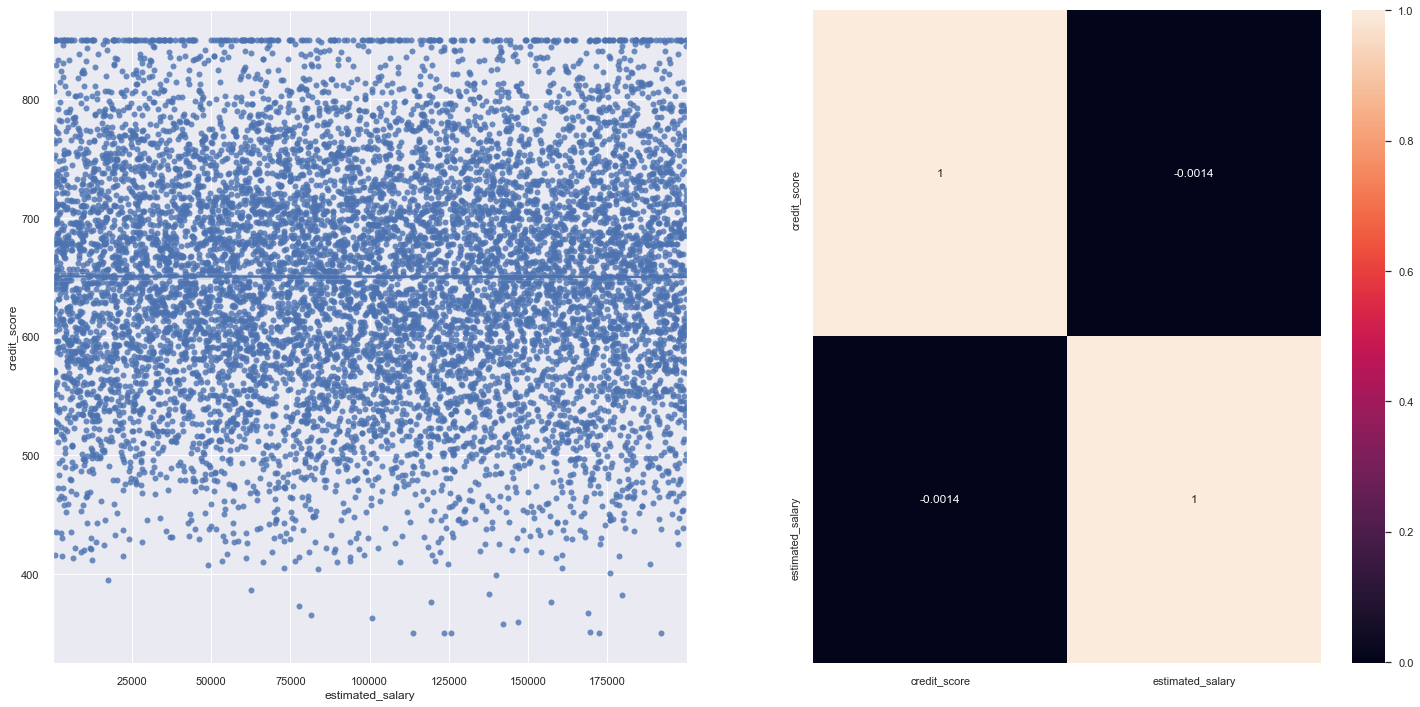

In [64]:
# Quanto maior o salário maior o credit_score.
subplot(1,2,1)
sns.regplot(x='estimated_salary',y='credit_score',data=df4);

subplot(1,2,2)
sns.heatmap(df4[['credit_score','estimated_salary']].corr(method='pearson'),annot=True);

**Quanto maior o balanço maior o credit_score**

**R: Falso, não correlação entre maior balanço e maior credito score**

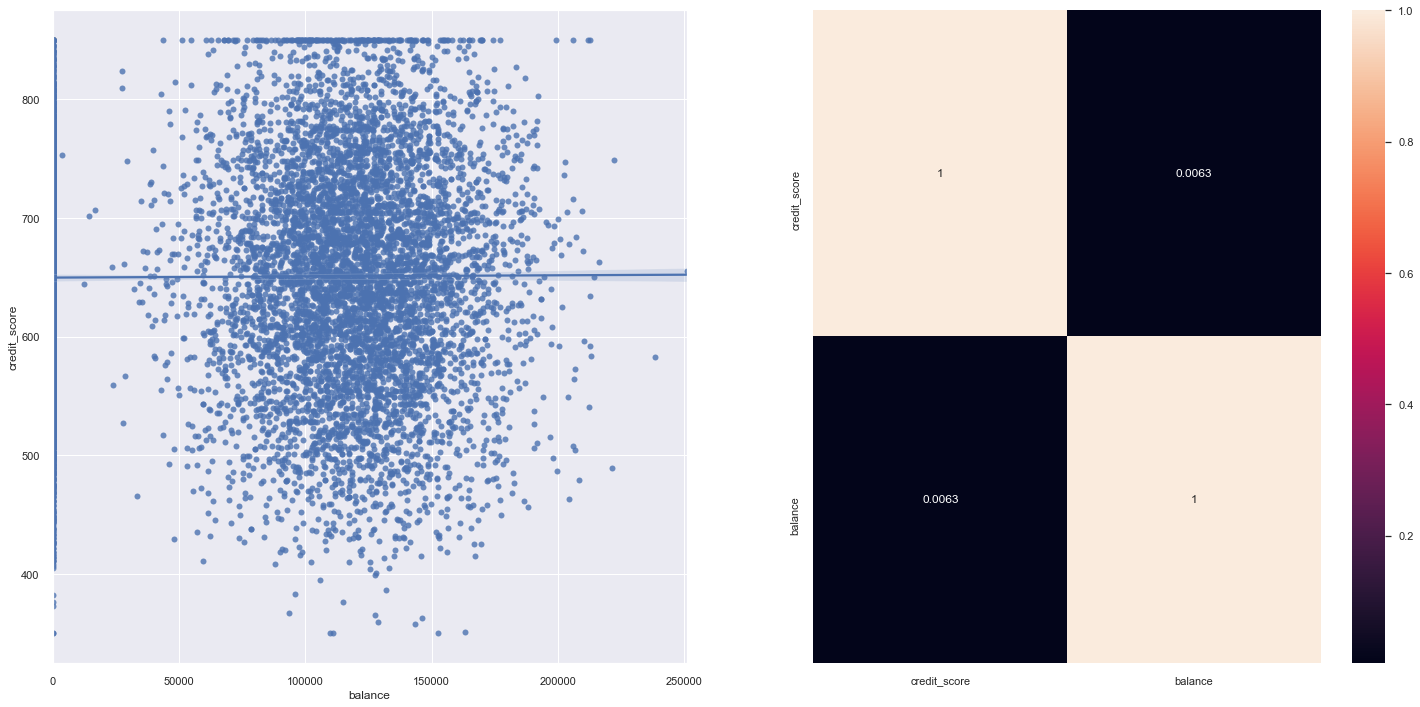

In [65]:
# Quanto maior o balanço maior o credit_score
subplot(1,2,1)
sns.regplot(x='balance',y='credit_score',data=df4);

subplot(1,2,2)
sns.heatmap(df4[['credit_score','balance']].corr(method='pearson'),annot=True);

**Quanto maior o numéro de produtos maior o credit score**

**R: Falso, não há correlação entre ter um alto número de produtos e ter um alto credit score**


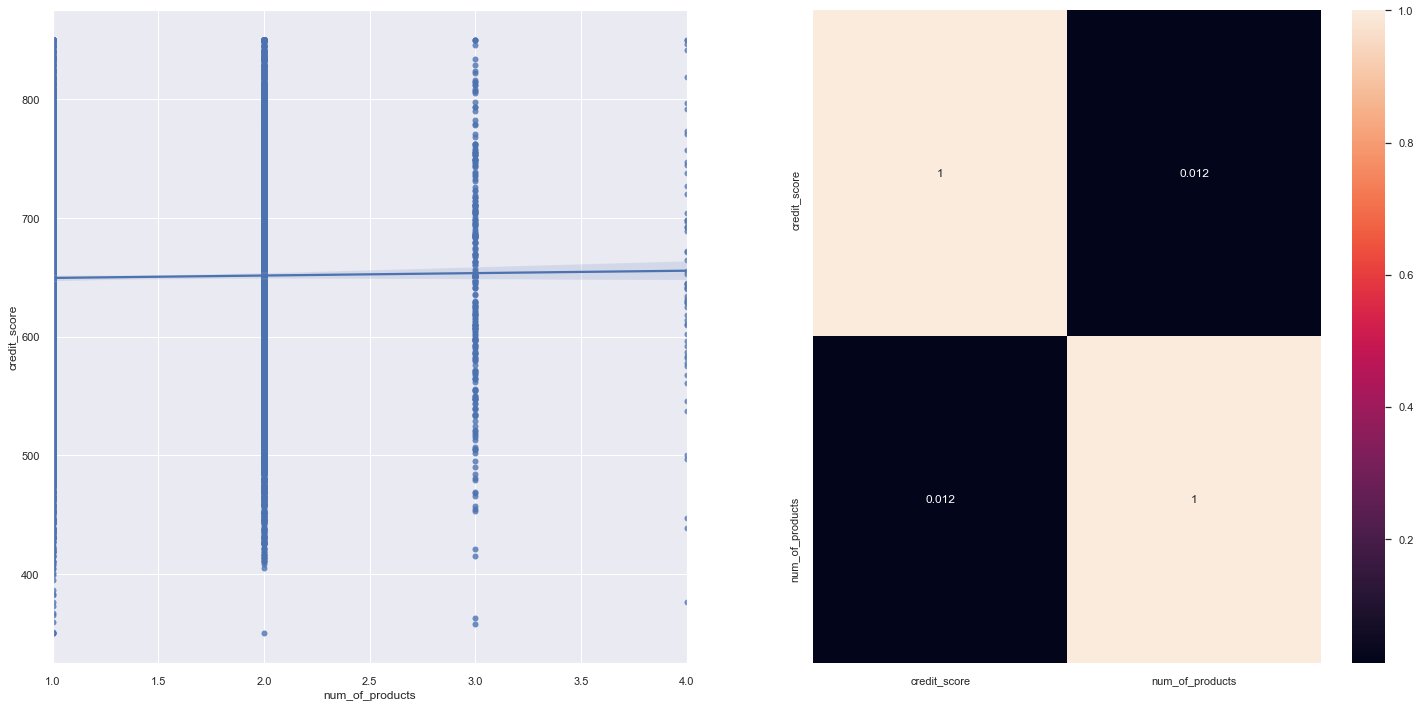

In [68]:
# Quanto maior o numéro de produtos maior o credit score
subplot(1,2,1)
sns.regplot(x='num_of_products',y='credit_score',data=df4);

subplot(1,2,2)
sns.heatmap(df4[['credit_score','num_of_products']].corr(method='pearson'),annot=True);

**Quanto maior o salário, maior o balanço**

**R: Falso, não há evidências de que um maior salário esteja correlacionado a um maior balanço.**

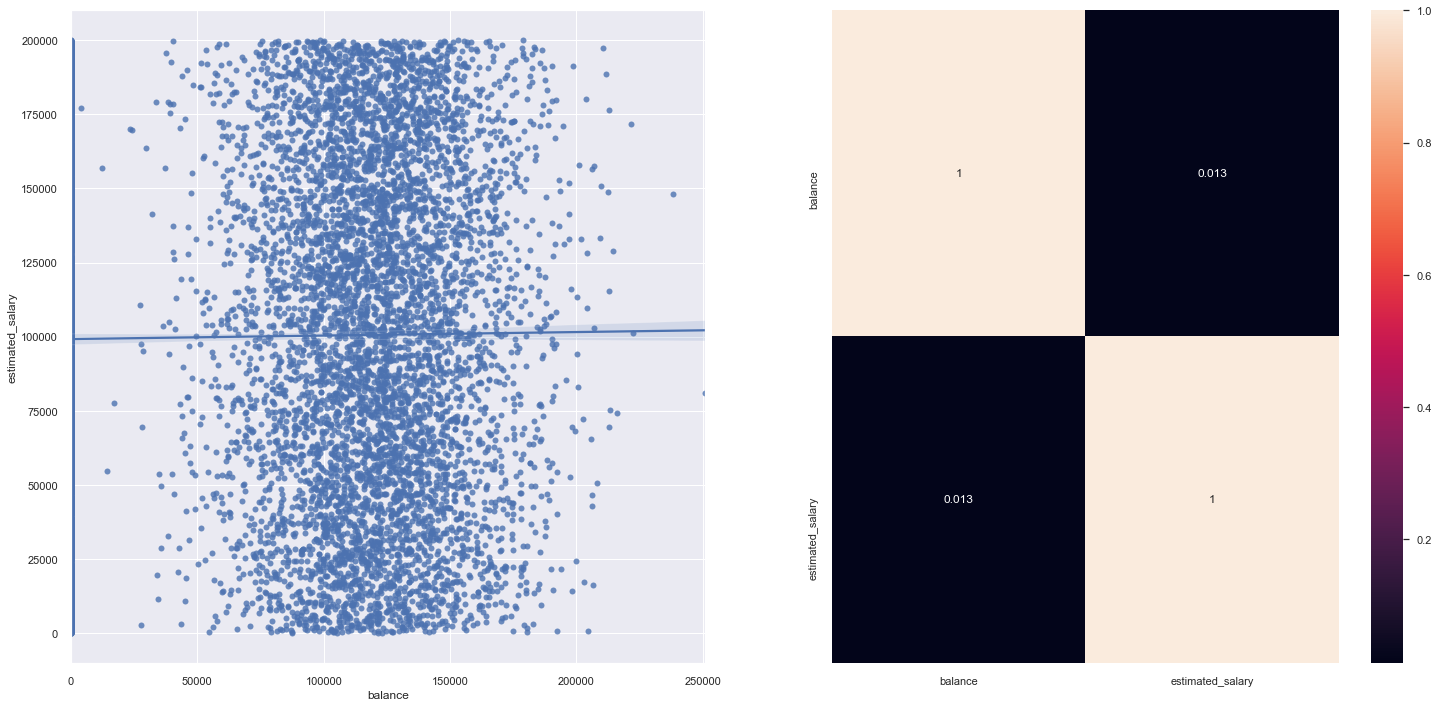

In [70]:
subplot(1,2,1)
sns.regplot(x='balance',y='estimated_salary',data=df4);

subplot(1,2,2)
sns.heatmap(df4[['balance','estimated_salary']].corr(method='pearson'),annot=True);

## 4.3 Churn and Active Account Analysis

In [76]:
# NEXT CRISP CYCLE

## 4.4 Multivariate Analysis

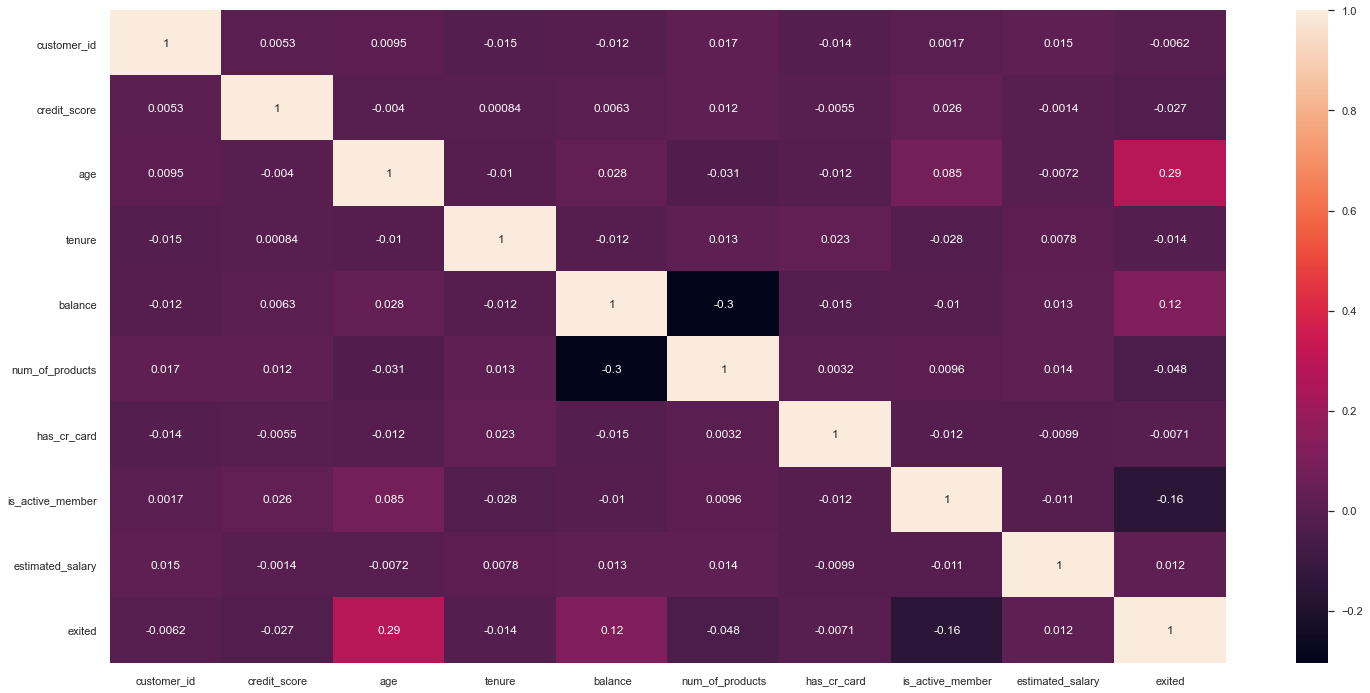

In [77]:
corr = num.corr(method='pearson')
sns.heatmap(corr, annot=True);

# 5.0 Data Preparation

In [98]:
df5 = df4.copy()

## 5.1. Categorical Variables

In [99]:
# One-hot Encoding - Geography
df5 = pd.get_dummies( df5, prefix=['geography'], columns=['geography'] )

# Label encoding - Gender
df5['gender'] = [1 if gender == 'Male' else 2 for gender in df5['gender']]

## 5.2 Numerical Variables

In [104]:
# Normalization
mms = MinMaxScaler(feature_range=(0, 1))
df5['age'] = mms.fit_transform(df5[['age']].values)
df5['credit_score'] = mms.fit_transform(df5[['credit_score']].values)

In [106]:
# Standardization
ss = StandardScaler()
df5['balance'] = ss.fit_transform(df5[['balance']].values)
df5['tenure'] = ss.fit_transform(df5[['tenure']].values)
df5['estimated_salary'] = ss.fit_transform(df5[['estimated_salary']].values)
df5['anual_revenue'] = ss.fit_transform(df5[['anual_revenue']].values)


In [108]:
# Check data preparation
df5.head()

,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,anual_revenue,geography_France,geography_Germany,geography_Spain
0,0.538,2,0.324324,-1.041760,-1.225848,1,1,1,0.021886,1,0.122521,1,0,0
1,0.516,2,0.310811,-1.387538,0.117350,1,0,1,0.216534,0,0.304344,0,0,1
2,0.304,2,0.324324,1.032908,1.333053,3,1,0,0.240687,1,0.326906,1,0,0
3,0.698,2,0.283784,-1.387538,-1.225848,2,0,0,-0.108918,0,-0.380680,1,0,0
4,1.000,2,0.337838,-1.041760,0.785728,1,1,1,-0.365276,0,-0.560280,0,0,1


# 6.0 Feature Selection

In [33]:
df6 = df5.copy()

# 7.0 Machine Learning Modelling

# 8.0 Hyperparameter Fine-Tunning

# 9.0 Model's acuracy

# 10.0 Deploy